In [83]:
import pandas as pd
import sys
import networkx as nx
import numpy as np
import karateclub.graph_embedding as ge
from sklearn.metrics.pairwise import cosine_similarity 
sys.path.append("../src/features/")
from graph_embed import GraphEmbed

In [21]:
all_networks = pd.read_csv('../data/raw/all_networks.csv')

In [22]:
GE = GraphEmbed("graph2vec")
GE.build_graphs(all_networks, 5)
graphs = GE.get_graphs()

In [23]:
GE.fit()

In [24]:
embeddings = GE.get_embedding_df()
X = GE.get_embedding()

In [25]:
similarity = cosine_similarity(X)

In [95]:
similarity[327].argmin()

115

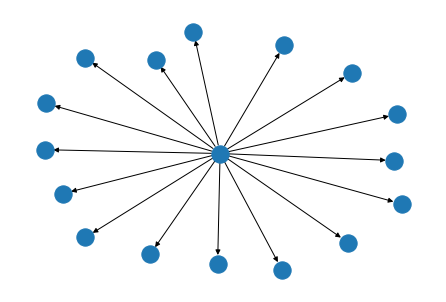

In [27]:
nx.draw(graphs[0])

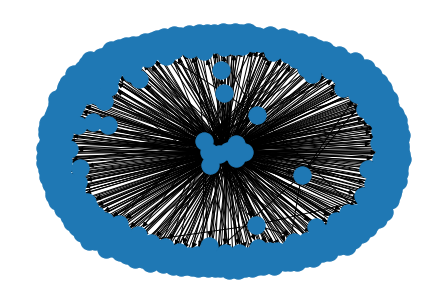

In [68]:
nx.draw(graphs[115])

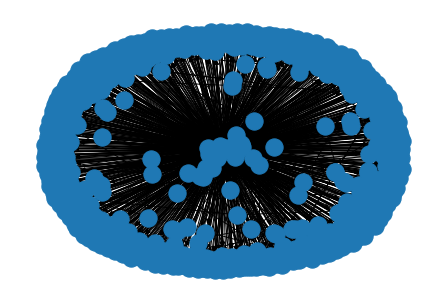

In [71]:
nx.draw(graphs[699])

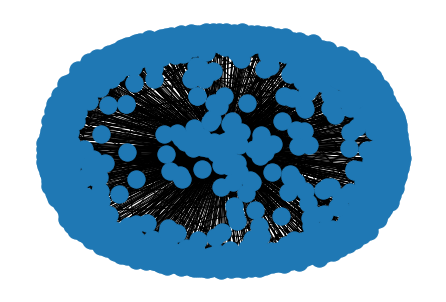

In [93]:
nx.draw(graphs[327])

In [57]:
big_network = all_networks.loc[all_networks.id == embeddings.iloc[699].article_id].iloc[0]

In [58]:
big_network.domain

'wattsupwiththat.com'

In [59]:
big_network.title

'BOMBSHELL: In court filing, Facebook admits ‘fact checks’ are nothing more than opinion'

In [60]:
big_network

canonical_url            https://wattsupwiththat.com/2021/12/09/bombshe...
date_published                                    2021-12-09T17:12:38.000Z
domain                                                 wattsupwiththat.com
from_user_id                                                      71869296
from_user_screen_name                                      wattsupwiththat
id                                                                 2766016
is_mention                                                           False
site_type                                                            claim
title                    BOMBSHELL: In court filing, Facebook admits ‘f...
to_user_id                                                        26036200
to_user_screen_name                                        ClimateRealists
tweet_created_at                                  2021-12-09T17:57:31.000Z
tweet_id                                               1469003290537074690
tweet_type               

## Getting number of nodes

In [84]:
num_nodes = []
for graph in graphs:
    num_nodes.append(len(graph.nodes))
num_nodes = np.array(num_nodes)

In [92]:
num_nodes.argmax()

327

In [96]:
num_nodes.mean()

36.05657894736842

In [97]:
num_nodes.max()

976

In [98]:
num_nodes.min()

4